In [1]:
# by Joh Schoeneberg, 2018
# BSD 3-clause licence

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json

#pyLattice modules / functions
import sys

import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

sys.path.append(workbookDir+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(workbookDir+"/classes")
import Track

workbookDir: /Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python


# input

In [4]:
inputParameters = pd.read_csv(workbookDir+'/../../input/imaging_data/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)

print(master_outputDataFolder)

inputParameters.style.set_properties(**{'text-align': 'left'})

5689.0
output_560


,key,value
0,inputDataFolder,/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/input/imaging_data
1,outputDataFolder,/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/input/imaging_data/output
2,movieLength,10
3,detectionAmplitudeCutoff,7000
4,framerate_msec,5689
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackingFilenameProcessed,trackedFeaturesProcessed.mat
9,trackingCsvFilenameProcessed,trackedFeaturesProcessed.csv


In [5]:
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/input/imaging_data
--- example of files found: cropped_560_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
--- number of files found: 10
--- folder searched in: /Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/input/imaging_data
--- example of files found: cropped_488_pm50px_maxAmpl_0001.tif_ratioCorrected.tif
--- number of files found: 10


# read one 3d frame

In [7]:
frameId = 0
path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape

/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/input/imaging_data/cropped_560_pm50px_maxAmpl_0001.tif_ratioCorrected.tif


# maximum Intensity Projection

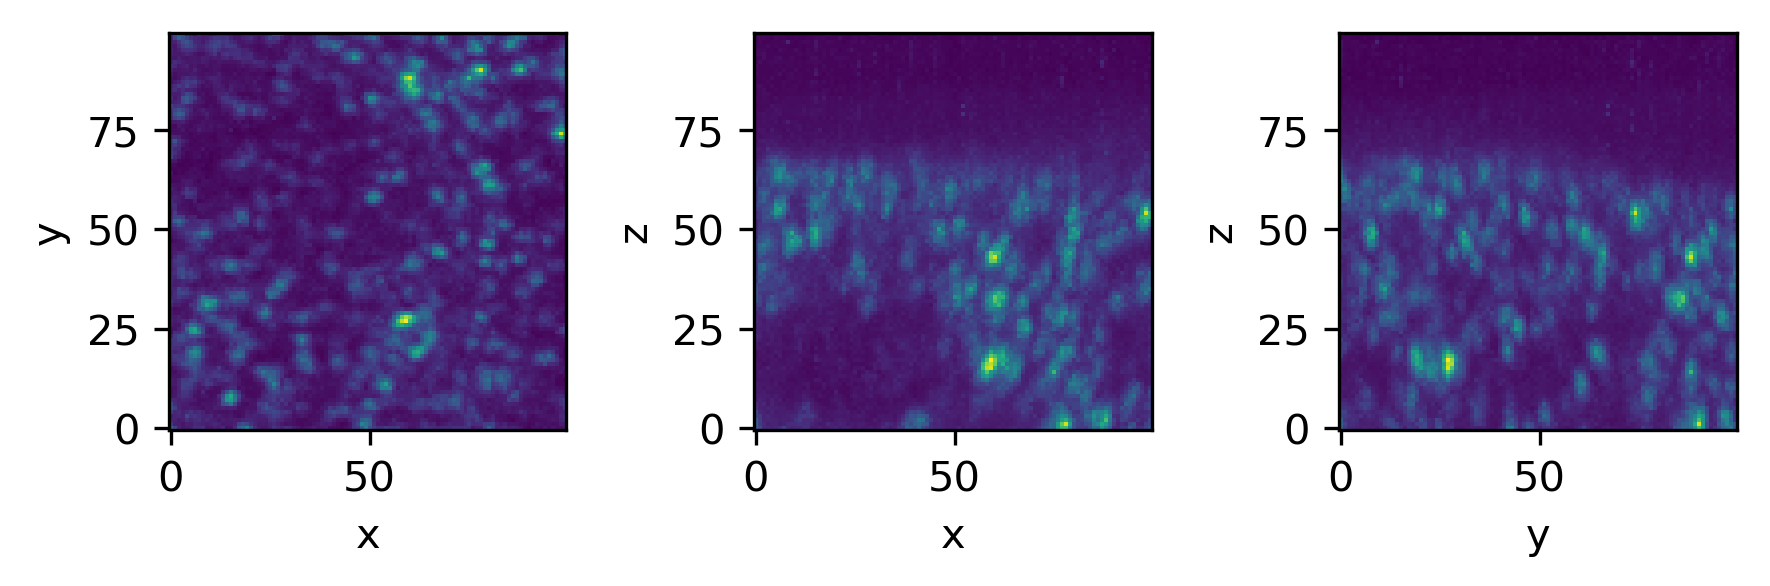

In [8]:
tiffproc.maxIntensityProjection(latticeMovieFrame)

# Plot single 2D slice

(100, 100, 100)


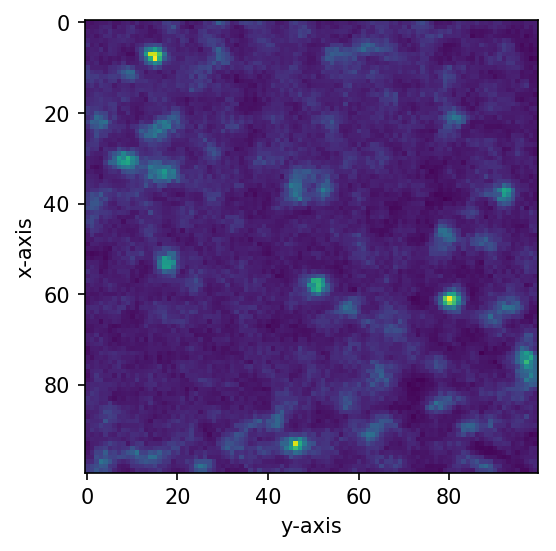

In [9]:

sliceId_z = 50


print(latticeMovieFrame_shape)
plt.figure(dpi=150)
plt.imshow(latticeMovieFrame[sliceId_z])
plt.xlabel('y-axis');
plt.ylabel('x-axis');

# Plot plot intensity of 1D line

3237.74060403
3573.86


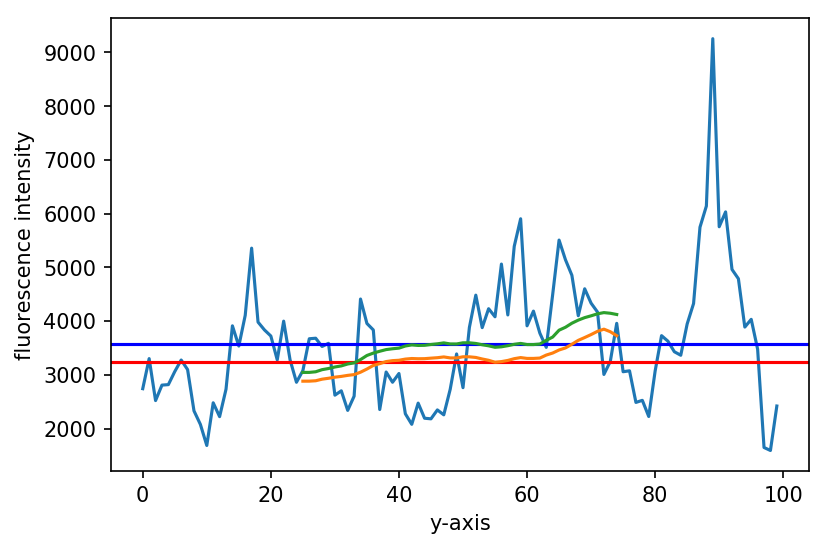

In [24]:
sliceId_x = 65
plt.figure(dpi=150)
plt.plot(latticeMovieFrame[sliceId_z][sliceId_x])
from scipy import stats
array = np.array(latticeMovieFrame[sliceId_z][sliceId_x])
hmean = stats.hmean(array)
mean=np.average(array)
print(hmean)
print(mean)
plt.axhline(y=hmean, color='r', linestyle='-')
plt.axhline(y=mean, color='b', linestyle='-')

size=50
result=[]
for i in range(size,len(array)):
    subset = array[i-size:i]
    result.append(stats.hmean(subset))
x = np.array(range(size,len(array)))-size/2
plt.plot(x,result)

result =[]
for i in range(size,len(array)):
    subset = array[i-size:i]
    result.append(np.average(subset))

plt.plot(x,result)
plt.xlabel('y-axis');
plt.ylabel('fluorescence intensity');